<a href="https://colab.research.google.com/github/Hibath-K/HibathullaTheAnalyst.github.io/blob/main/Clinic_revenue_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

**Import Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fake_clinic_data_extract_test (1).csv to fake_clinic_data_extract_test (1).csv


In [3]:
import io

In [4]:

df = pd.read_csv(io.BytesIO(uploaded['fake_clinic_data_extract_test (1).csv']))

In [5]:
df.head()

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,30-12-21,clinic_2,70172,1030,30,98.13
1,29-12-21,clinic_1,53371,756,15,65.13
2,29-12-21,clinic_2,69545,1030,30,105.18
3,27-12-21,clinic_1,43859,756,30,58.11
4,23-12-21,clinic_1,69303,756,30,119.00


**Calculate sum of each day revenue**

In [6]:
df['appointment_date'].unique()

date_sum_li = []

for date in df['appointment_date'].unique():
    aa = df[df['appointment_date'] == date]
    date_sum = aa['revenues_from_appointment'].sum()
    date_li = [date, date_sum]
    date_sum_li.append(date_li)

date_sum_df = pd.DataFrame(date_sum_li, columns = ['date', 'revenues_from_appointment'])
date_sum_df

,date,revenues_from_appointment
0,30-12-21,4073.23
1,29-12-21,3160.27
2,27-12-21,3058.86
3,23-12-21,8642.20
4,21-12-21,11345.07
...,...,...
127,09-07-21,1545.44
128,01-07-21,443.66
129,24-09-21,1653.52
130,02-07-21,443.55


In [7]:
date_sum_df['date'] = pd.to_datetime(date_sum_df['date'])
date_sum_df = date_sum_df.sort_values(by=['date'])
date_sum_df.reset_index(inplace=True, drop=True)
date_sum_df

,date,revenues_from_appointment
0,2021-01-07,443.66
1,2021-01-09,3656.15
2,2021-01-10,4012.93
3,2021-01-12,4397.37
4,2021-02-07,443.55
...,...,...
127,2021-12-23,8642.20
128,2021-12-27,3058.86
129,2021-12-28,4668.94
130,2021-12-29,3160.27


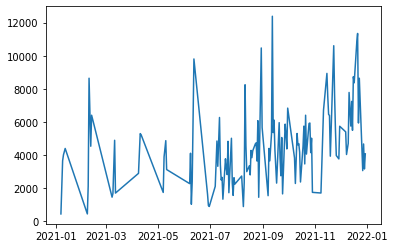

In [8]:
plt.plot(date_sum_df['date'], date_sum_df['revenues_from_appointment'])

**Create prophet model**

In [9]:
date_sum_df.columns = ['ds', 'y']
model = Prophet()
model.fit(date_sum_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Creating future dates**

In [10]:
date1 = '2022-01-01'
date2 = '2022-12-31'
future = pd.date_range(date1, date2).tolist()
future = pd.DataFrame(future, columns = ['ds'])
future

,ds
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
360,2022-12-27
361,2022-12-28
362,2022-12-29
363,2022-12-30


**Predict revenue for future dates**

In [11]:
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,6987.419240,4205.867095,9537.542496
1,2022-01-02,8746.523287,6198.447823,11309.434329
2,2022-01-03,6386.671508,3685.177778,8912.281253
3,2022-01-04,6485.444230,3888.933770,9007.423824
4,2022-01-05,5298.258034,2924.584449,7894.302454


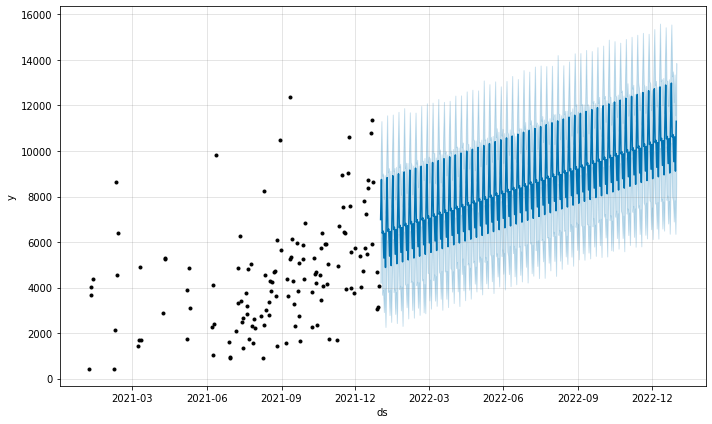

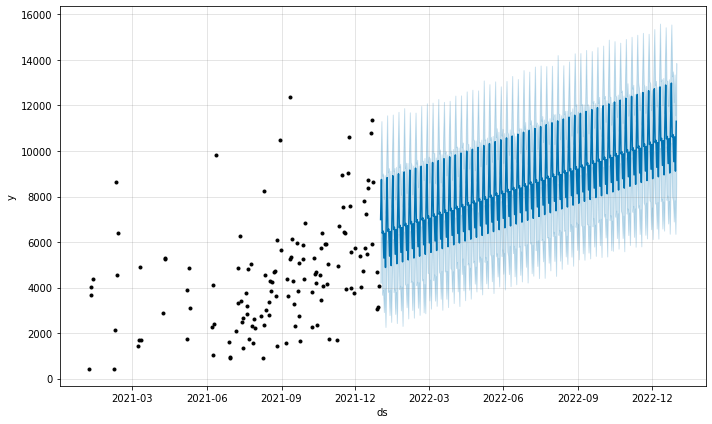

In [12]:
model.plot(forecast)

In [13]:
forecast_values = forecast[['ds', 'yhat']]
forecast_values.columns = ['date', 'revenues_from_appointment']
forecast_values

,date,revenues_from_appointment
0,2022-01-01,6987.419240
1,2022-01-02,8746.523287
2,2022-01-03,6386.671508
3,2022-01-04,6485.444230
4,2022-01-05,5298.258034
...,...,...
360,2022-12-27,10718.647598
361,2022-12-28,9531.461401
362,2022-12-29,10617.154334
363,2022-12-30,9115.933644


In [14]:
forecast_values.to_csv('clinical_revenue_forecasted.csv',index=False)

In [15]:
date_sum_df.to_csv('date_sum_df.csv',index=False)